In [1]:
import requests
import json
import pandas as pd
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import quandl

In [2]:
eia_category = "NG.N3045US2.M"
eia_series = "NG.N9010US2.M"
response = requests.get(f"http://api.eia.gov/series/?api_key=6042e415172688d1d112acd5f5784d6e&series_id={eia_category}").json()
data_volume = response['series'][0]['data']
df = pd.DataFrame(data_volume)
df_vol = df.rename(columns={0: "Date", 1:"Powerburn"}).set_index('Date')
df_vol_dates = df_vol.loc[:'201402']
df_vol_dates

,Powerburn
Date,
202007,1374045
202006,1046737
202005,832426
202004,763917
202003,880779
...,...
201406,720750
201405,646929
201404,548899


In [3]:
response2 = requests.get(f"http://api.eia.gov/series/?api_key=6042e415172688d1d112acd5f5784d6e&series_id={eia_series}").json()
data_withdrawls = response2['series'][0]['data']
df = pd.DataFrame(data_withdrawls)
df_wth = df.rename(columns={0: "Date", 1: "Production"}).set_index('Date')
df_withdrawals = df_wth.loc[:'201402']
df_withdrawals 

,Production
Date,
202007,3394424.0
202006,3232859.0
202005,3301600.0
202004,3375288.0
202003,3565004.0
...,...
201406,2560033.0
201405,2633253.0
201404,2583873.0


In [4]:
EIA_info = df_withdrawals.join(df_vol_dates, how='outer')
EIA_info.reindex
EIA_info

,Production,Powerburn
Date,,
202007,3394424.0,1374045
202006,3232859.0,1046737
202005,3301600.0,832426
202004,3375288.0,763917
202003,3565004.0,880779
...,...,...
201406,2560033.0,720750
201405,2633253.0,646929
201404,2583873.0,548899


In [5]:
# Natural Gas Data comes from here "https://www.quandl.com/api/v3/datasets/CHRIS/CME_QG1.json?api_key=ySeoUUxoM_rMjeXGG9Fv"
NaturalGas = quandl.get("CHRIS/CME_QG1", authtoken="ySeoUUxoM_rMjeXGG9Fv")
# We need to calculate Monthly Average for Natural Gas
NaturalGasAverg = NaturalGas.resample('M').mean()
# Get only column what we need
NGAVG = NaturalGasAverg[['Settle']]
# Coal Data comes from here "https://www.quandl.com/data/EIA/COAL-US-Coal-Prices-by-Region"
Coal = quandl.get("EIA/COAL", authtoken="ySeoUUxoM_rMjeXGG9Fv")
# We need to calculate Monthly Average for Coal
CoalAverage = Coal.resample('M').mean()
# We have a little problem here Natural Gas data starting from 2014 but Coal data starting from 2008
# We need to do arrays same lenght then we can combined to both data
CoalAverageE = CoalAverage[69:]
# Now we can merge them
MASTER = pd.concat([CoalAverageE, NGAVG], axis=1)
# Now we have All Data
MASTER.sort_values(by=['Week Ended'], inplace=True, ascending=False)
MASTER2 = MASTER.iloc[3:]
MASTER2



,"Central Appalachia 12,500 Btu, 1.2 SO2","Northern Apppalachia 13,000 Btu, <3.0 SO2","Illinois Basin 11,800 Btu, 5.0 SO2","Powder River Basin 8,800 Btu, 0.8 SO2","Uinta Basin 11,700 Btu, 0.8 SO2",Settle
Week Ended,,,,,,
2020-07-31,51.6000,42.6600,34.0400,11.9900,29.060,1.768409
2020-06-30,56.0625,43.5000,34.0000,11.7250,28.900,1.703091
2020-05-31,54.8100,42.3400,32.4400,11.4900,29.660,1.817350
2020-04-30,55.2000,46.8000,33.3000,11.5500,30.600,1.748381
2020-03-31,55.7750,44.7250,33.3750,11.6000,30.800,1.732864
...,...,...,...,...,...,...
2014-06-30,60.5375,65.0750,45.8625,12.8875,36.750,4.596524
2014-05-31,61.2400,67.6360,46.0160,13.0160,36.734,4.535714
2014-04-30,60.4000,68.5650,47.0050,12.9775,36.610,4.609143


In [6]:
EIA_info.reset_index(drop=False, inplace=True)
EIA_info

,Date,Production,Powerburn
0,202007,3394424.0,1374045
1,202006,3232859.0,1046737
2,202005,3301600.0,832426
3,202004,3375288.0,763917
4,202003,3565004.0,880779
...,...,...,...
73,201406,2560033.0,720750
74,201405,2633253.0,646929
75,201404,2583873.0,548899
76,201403,2623914.0,560808


In [7]:
MASTER2.reset_index(drop=False, inplace=True)
MASTER2

,Week Ended,"Central Appalachia 12,500 Btu, 1.2 SO2","Northern Apppalachia 13,000 Btu, <3.0 SO2","Illinois Basin 11,800 Btu, 5.0 SO2","Powder River Basin 8,800 Btu, 0.8 SO2","Uinta Basin 11,700 Btu, 0.8 SO2",Settle
0,2020-07-31,51.6000,42.6600,34.0400,11.9900,29.060,1.768409
1,2020-06-30,56.0625,43.5000,34.0000,11.7250,28.900,1.703091
2,2020-05-31,54.8100,42.3400,32.4400,11.4900,29.660,1.817350
3,2020-04-30,55.2000,46.8000,33.3000,11.5500,30.600,1.748381
4,2020-03-31,55.7750,44.7250,33.3750,11.6000,30.800,1.732864
...,...,...,...,...,...,...,...
73,2014-06-30,60.5375,65.0750,45.8625,12.8875,36.750,4.596524
74,2014-05-31,61.2400,67.6360,46.0160,13.0160,36.734,4.535714
75,2014-04-30,60.4000,68.5650,47.0050,12.9775,36.610,4.609143
76,2014-03-31,59.5600,68.2750,46.8550,12.5750,36.125,4.474950


In [8]:
Data = MASTER2.merge(EIA_info, left_index=True, right_index=True)
del Data['Date']


In [9]:
##https://www.ncdc.noaa.gov/cag/national/haywood
AvgConusTemp = [53.6,50,45.9,42.2,39.3,35.9,35.5,52.7,54.2,55.5,55.8,54.3,51.5,47.6,43.4,39.4,34.9,32.2,32.6,53.5,55.2,56.7,57,55.7,53.1,49.4,45,39.9,36.8,33.8,32.2,54.6,56.4,57.5,57.7,56.7,54.5,50.9,47.1,43.7,40.3,37.4,33.6,54.9,56.9,57.8,57.8,56.7,54.2,50.7,46.5,43.1,39.7,35.9,32.2,54.4,55.8,57,56.9,55.5,53,49.5,45.1,41.2,37.2,33,33.1,52.5,54,55.4,55.3,53.9,51.3,47.6,43.2,38.7,34.4,31.4]
Data['AvgConusTemp'] = AvgConusTemp
Data

,Week Ended,"Central Appalachia 12,500 Btu, 1.2 SO2","Northern Apppalachia 13,000 Btu, <3.0 SO2","Illinois Basin 11,800 Btu, 5.0 SO2","Powder River Basin 8,800 Btu, 0.8 SO2","Uinta Basin 11,700 Btu, 0.8 SO2",Settle,Production,Powerburn,AvgConusTemp
0,2020-07-31,51.6000,42.6600,34.0400,11.9900,29.060,1.768409,3394424.0,1374045,53.6
1,2020-06-30,56.0625,43.5000,34.0000,11.7250,28.900,1.703091,3232859.0,1046737,50.0
2,2020-05-31,54.8100,42.3400,32.4400,11.4900,29.660,1.817350,3301600.0,832426,45.9
3,2020-04-30,55.2000,46.8000,33.3000,11.5500,30.600,1.748381,3375288.0,763917,42.2
4,2020-03-31,55.7750,44.7250,33.3750,11.6000,30.800,1.732864,3565004.0,880779,39.3
...,...,...,...,...,...,...,...,...,...,...
73,2014-06-30,60.5375,65.0750,45.8625,12.8875,36.750,4.596524,2560033.0,720750,47.6
74,2014-05-31,61.2400,67.6360,46.0160,13.0160,36.734,4.535714,2633253.0,646929,43.2
75,2014-04-30,60.4000,68.5650,47.0050,12.9775,36.610,4.609143,2583873.0,548899,38.7
76,2014-03-31,59.5600,68.2750,46.8550,12.5750,36.125,4.474950,2623914.0,560808,34.4


In [16]:
# Assign the data to X and y

X = Data[["Central Appalachia 12,500 Btu, 1.2 SO2",
          "Northern Apppalachia 13,000 Btu, <3.0 SO2",
          'Settle',
          'Production',
          'AvgConusTemp',
          'Illinois Basin 11,800 Btu, 5.0 SO2',
          'Powder River Basin 8,800 Btu, 0.8 SO2',
          'Uinta Basin 11,700 Btu, 0.8 SO2'
         ]]
y = Data["Powerburn"].values.reshape(-1, 1)
print(X.shape, y.shape)

(78, 8) (78, 1)


In [23]:
# Use train_test_split to create training and testing data
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.7)
#############################
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION
# Create the model using LinearRegression
### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [24]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train_scaled, y_train_scaled)
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

### END SOLUTION 
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


Training Score: 0.4750266368604369
Testing Score: 0.4303960879573809


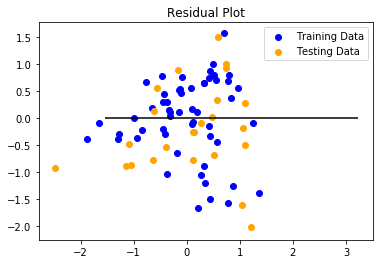

In [25]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7068653497503883, R2: 0.4303960879573809
